# 05-Decision-trees-and-random-forest.ipynb

### 1. What accuracy can you achieve using a decision trees with a depth of 3? Plot the corresponding decision tree with plot_tree() (see here for more)

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

/Applications/anaconda3/envs/adsml/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# creating x and y

train_features = np.load('train_features.npz')['features']
train_labels = np.load('labelled_train_features.npz')['labels']
valid_features = np.load('valid_features.npz')['features']
valid_labels = np.load('labelled_valid_features.npz')['labels']
test_features = np.load('test_features.npz')['features']
test_labels = np.load('labelled_test_features.npz')['labels']

labels_df_train = pd.DataFrame(train_labels) 
labels_df_valid = pd.DataFrame(valid_labels) 
labels_df_test = pd.DataFrame(test_labels) 
y_tr = labels_df_train.values.ravel()
y_val = labels_df_valid.values.ravel()
y_te = labels_df_test.values.ravel()

features_df_train = pd.DataFrame(train_features) 
features_df_valid = pd.DataFrame(valid_features) 
features_df_test = pd.DataFrame(test_features)
X_tr = features_df_train.values
X_val = features_df_valid.values
X_te = features_df_test.values


In [3]:
# Create decision tree
dt = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=0)

# Fit decision tree
dt.fit(X_tr, y_tr)

# Get score
print(' training score: ',dt.score(X_tr, y_tr))
print(' test score: ',dt.score(X_te, y_te))

 training score:  0.45
 test score:  0.22


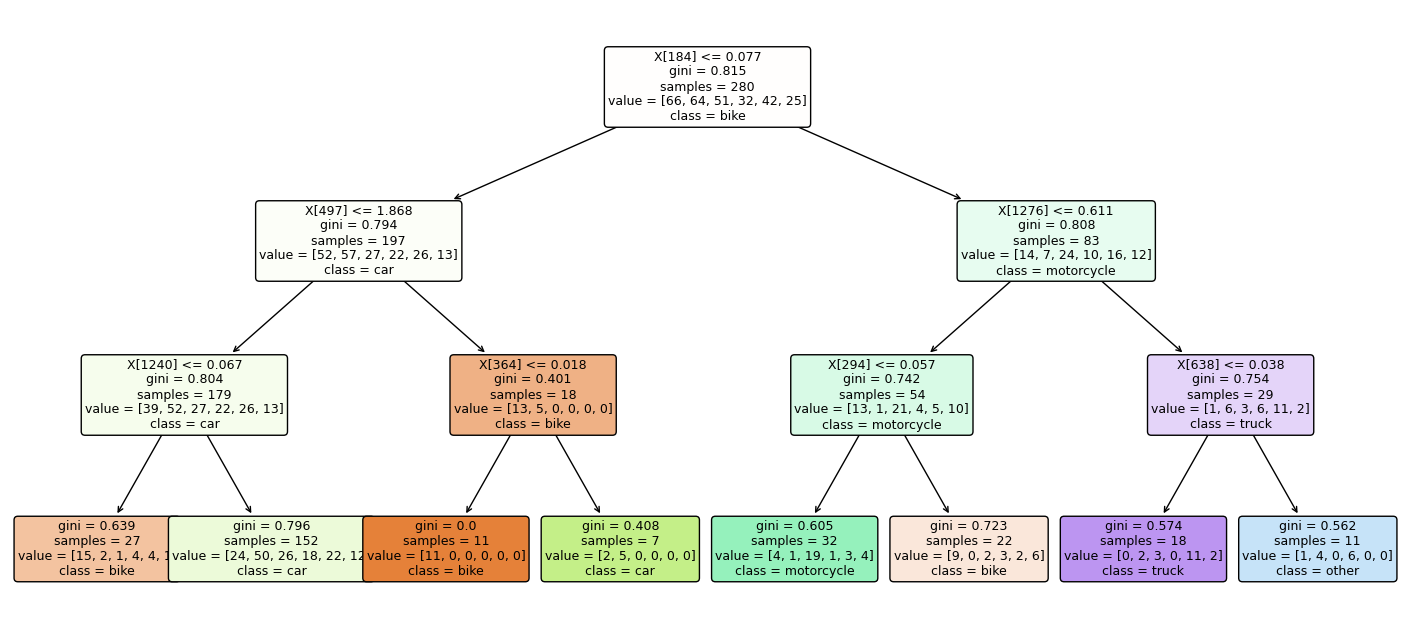

In [4]:
#plotting

plt.figure(figsize=(18, 8))  
plot_tree(
    dt,
    filled=True,
    rounded=True,
    class_names=["bike", "car", "motorcycle", "other", "truck", "van"],
    fontsize=9,  
    proportion=False,
)
plt.show()

### 2. Tune the depth of your decision tree. Does it improve the accuracy?


As I will be tuning the depth with grid search and cross validation, I will merge again the train and validation sets

In [5]:
# y
labels_df_train_valid = pd.concat([labels_df_train, labels_df_valid])
labels_df_train_valid.reset_index(drop=True, inplace=True)
y_tr_val = labels_df_train_valid.values.ravel()
# X
features_df_train_valid = pd.concat([features_df_train, features_df_valid])
features_df_train_valid.reset_index(drop=True, inplace=True)
X_tr_val = features_df_train_valid.values

In [6]:
param_grid = {'max_depth': [2,3,4,5,6,7,8]  }
dt2 = DecisionTreeClassifier(random_state=0)
grid_search = GridSearchCV(estimator=dt2, param_grid=param_grid, cv=5)
grid_search.fit(X_tr_val, y_tr_val)
grid_search.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_depth', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [7]:
# Get the results with "cv_results_"
grid_search.cv_results_.keys()

# Collect results in a DataFrame
cv_results = pd.DataFrame(grid_search.cv_results_)

# Print a few interesting columns
cols = [
    "mean_test_score",
    "std_test_score",
    "param_max_depth",
]
cv_results[cols].sort_values("mean_test_score", ascending=False)

,mean_test_score,std_test_score,param_max_depth
0,0.267585,0.092325,2
1,0.238956,0.093030,3
2,0.236575,0.091640,4
6,0.227022,0.077716,8
3,0.214974,0.062437,5
5,0.203012,0.065359,7
4,0.181383,0.040809,6


Observation:<br>
Yes, its possible to do better, by decreasing the tree's depth from 3 to 2 its possible to increase the validation accuracy from 0.22 to 0.26

### 3. Try a random forest model and tune the number of trees and their depth. Does increasing the number of trees help? Is there an optimal depth and how does it compare to your decision tree above?

In [8]:
param_grid = {
    'max_depth': [2, 3, 4, 5, 6, 7, 8], # different tree depths
    'n_estimators': [ 50, 100, 300, 400]} # different numbers of trees

rf = RandomForestClassifier(random_state=0)
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
grid_search_rf.fit(X_tr_val, y_tr_val)
grid_search_rf.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_depth', 'param_n_estimators', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [9]:
cv_results_rf = pd.DataFrame(grid_search_rf.cv_results_)
cols = [
    "mean_test_score",
    "std_test_score",
    "param_max_depth",
    "param_n_estimators"
]
cv_results_rf[cols].sort_values("mean_test_score", ascending=False)


,mean_test_score,std_test_score,param_max_depth,param_n_estimators
27,0.344177,0.188690,8,400
26,0.341824,0.179308,8,300
23,0.337149,0.198874,7,400
22,0.334710,0.191619,7,300
19,0.329920,0.172798,6,400
21,0.325273,0.190948,7,100
25,0.325186,0.175862,8,100
15,0.322633,0.174102,5,400
16,0.320310,0.148429,6,50
18,0.320281,0.160233,6,300


Increasing the number of trees from 1 to different sizes of forests improves the accuracy from 0.28 to 0.34 : the more threes the better. With multiple trees it seems the models with the higher depth tend to perform better as well.

### 4.The random forest estimator provides a ranking of the features according to their importance in the classification task via thefeature_importances_ attribute. Find the the top 5 important features and visualize their importance scores.

In [10]:
importances = grid_search_rf.best_estimator_.feature_importances_
print(importances)
len(importances)

[0.00116841 0.00077803 0.00066239 ... 0.00050741 0.00090965 0.0005712 ]


1280

Note: <br>
importance tells how much each feature contributes to predict the target variable or how much it contritures to decrease impurity

top_indices:  [ 173 1005  915   76 1179]


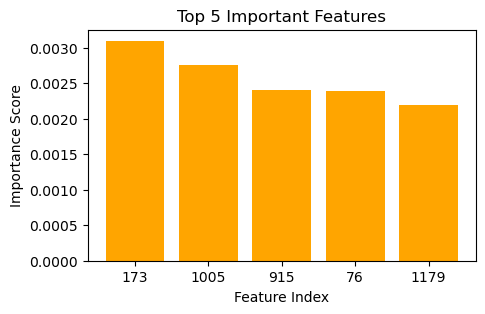

In [11]:
# top 5 
top_indices = np.argsort(importances)[::-1][:5]
print('top_indices: ',top_indices)

# importance scores 
top_importance_scores = importances[top_indices]

plt.figure(figsize=(5, 3))
plt.bar(range(len(top_importance_scores)), top_importance_scores, color='orange')  # Change color if desired
plt.xlabel('Feature Index')
plt.ylabel('Importance Score')
plt.title('Top 5 Important Features')
plt.xticks(range(len(top_importance_scores)), top_indices)
plt.show()

### 5.Are these top features similar to those found based on the coefficients in the logistic regression task, and also during the data exploration in the last question of Task1?

Answer: <br>
* Most important features in task1 were (accross all categories) :165, 261, 59, 1120, 257
* Most important features in logistic regression depended on category, none of them appeared on more than 1 category
* Most important features in random forest (accross all categories) are 999, 804, 634, 759, 273

So far, each model yields different results